In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


import pyTsetlinMachine
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
from pyTsetlinMachine.tm import RegressionTsetlinMachine
from pyTsetlinMachine.tools import Binarizer


In [2]:
number_of_folds = 24

In [3]:
def k10Fold(nfolds,data):
    isOdd = False
    efsize = len(data)//nfolds
    if len(data)-efsize*nfolds:
        isOdd = True
    folds = []
    foldscounter = 0
    counter = 0
    curfold = []
    i = 0
    for item in data:
        if foldscounter < nfolds+1:   #rows / folds
            if counter < efsize :
                curfold.append(i)
                counter += 1
            else:
                foldscounter+=1
                if foldscounter != nfolds:
                    folds.append(curfold)
                    
                    curfold = []
                    curfold.append(i)
                    counter = 1
            i+=1
        else:
            curfold.append(i)
            i+=1
    folds.append(curfold)
    print(folds)
    return folds
def trainTestSpliter(testFolIndex,data):
    test_data = []
    train_data = []
    for i in range(len(data)):
        if i not in testFolIndex:
            train_data.append(data[i])
        else:
            test_data.append(data[i])
    return np.array(train_data), np.array(test_data)
def dataTargetSpluter(train_d,test_d):
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    for i in train_d:
        train_x.append(i[:6])
        train_y.append(i[6])
    for i in test_d:
        test_x.append(i[:6])
        test_y.append(i[6])
    return np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

In [4]:
filename = "alber.csv"
df = pd.read_csv(filename, header=0, usecols=["IN","OUT","INQ","FILE","ADJ","FP","EFFORT"])

In [5]:
"""scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)"""
scaled_data = np.array(df)

In [6]:
foldsIndex = k10Fold(number_of_folds,scaled_data)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23]]


 
Fold  # 1


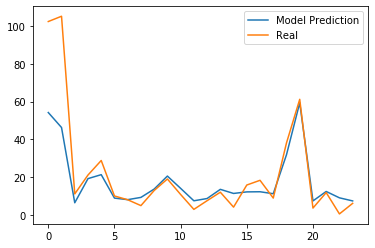

Prediction :  54.19614285714286       real : 102.4
Prediction :  46.268857142857144       real : 105.2
Prediction :  6.4080714285714295       real : 11.1
Prediction :  19.196428571428573       real : 21.1
Prediction :  21.290428571428574       real : 28.8
Prediction :  8.876       real : 10.0
Prediction :  8.053357142857143       real : 8.0
Prediction :  9.24992857142857       real : 4.9
Prediction :  13.662285714285714       real : 12.9
Prediction :  20.54257142857143       real : 19.0
Prediction :  14.036214285714287       real : 10.8
Prediction :  7.455071428571429       real : 2.9
Prediction :  8.651642857142859       real : 7.5
Prediction :  13.512714285714285       real : 12.0
Prediction :  11.343928571428572       real : 4.1
Prediction :  12.166571428571428       real : 15.8
Prediction :  12.241357142857144       real : 18.3
Prediction :  11.194357142857143       real : 8.9
Prediction :  31.835214285714287       real : 38.1
Prediction :  59.35635714285715       real : 61.2
Predi

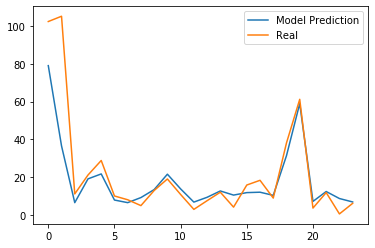

Prediction :  79.03578571428572       real : 102.4
Prediction :  36.52892857142857       real : 105.2
Prediction :  6.468428571428572       real : 11.1
Prediction :  19.060357142857143       real : 21.1
Prediction :  21.680642857142857       real : 28.8
Prediction :  7.851357142857144       real : 10.0
Prediction :  6.468428571428572       real : 8.0
Prediction :  9.1615       real : 4.9
Prediction :  13.383071428571428       real : 12.9
Prediction :  21.53507142857143       real : 19.0
Prediction :  13.747       real : 10.8
Prediction :  6.759571428571428       real : 2.9
Prediction :  9.30707142857143       real : 7.5
Prediction :  12.655214285714285       real : 12.0
Prediction :  10.471642857142857       real : 4.1
Prediction :  11.781785714285714       real : 15.8
Prediction :  12.000142857142858       real : 18.3
Prediction :  10.326071428571428       real : 8.9
Prediction :  31.361142857142863       real : 38.1
Prediction :  58.94692857142858       real : 61.2
Prediction :  7.12

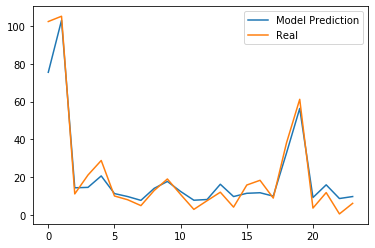

Prediction :  75.51007142857144       real : 102.4
Prediction :  103.0312142857143       real : 105.2
Prediction :  14.335357142857143       real : 11.1
Prediction :  14.559714285714287       real : 21.1
Prediction :  20.61735714285714       real : 28.8
Prediction :  11.269142857142858       real : 10.0
Prediction :  9.698642857142858       real : 8.0
Prediction :  7.679428571428572       real : 4.9
Prediction :  14.036214285714287       real : 12.9
Prediction :  17.700714285714287       real : 19.0
Prediction :  12.39092857142857       real : 10.8
Prediction :  7.754214285714285       real : 2.9
Prediction :  8.128142857142857       real : 7.5
Prediction :  16.205       real : 12.0
Prediction :  9.698642857142858       real : 4.1
Prediction :  11.418714285714286       real : 15.8
Prediction :  11.717857142857143       real : 18.3
Prediction :  9.923       real : 8.9
Prediction :  32.732642857142864       real : 38.1
Prediction :  56.36492857142858       real : 61.2
Prediction :  9.175

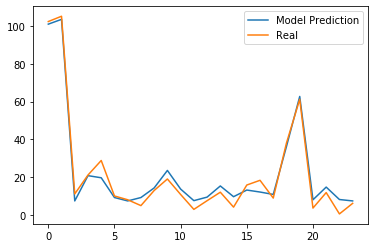

Prediction :  101.01200000000001       real : 102.4
Prediction :  103.55471428571428       real : 105.2
Prediction :  7.380285714285714       real : 11.1
Prediction :  20.766928571428572       real : 21.1
Prediction :  19.645142857142858       real : 28.8
Prediction :  9.175142857142857       real : 10.0
Prediction :  7.380285714285714       real : 8.0
Prediction :  9.175142857142857       real : 4.9
Prediction :  14.260571428571428       real : 12.9
Prediction :  23.534000000000002       real : 19.0
Prediction :  13.662285714285714       real : 10.8
Prediction :  7.529857142857144       real : 2.9
Prediction :  9.399500000000002       real : 7.5
Prediction :  15.30757142857143       real : 12.0
Prediction :  9.623857142857142       real : 4.1
Prediction :  13.138785714285714       real : 15.8
Prediction :  12.091785714285715       real : 18.3
Prediction :  10.820428571428572       real : 8.9
Prediction :  36.247571428571426       real : 38.1
Prediction :  62.72171428571429       real 

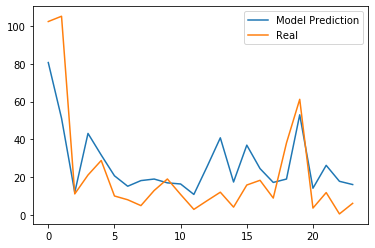

Prediction :  80.67028571428573       real : 102.4
Prediction :  51.20471428571429       real : 105.2
Prediction :  11.86742857142857       real : 11.1
Prediction :  43.127857142857145       real : 21.1
Prediction :  31.68564285714286       real : 28.8
Prediction :  20.69214285714286       real : 10.0
Prediction :  15.158000000000001       real : 8.0
Prediction :  18.149428571428572       real : 4.9
Prediction :  18.97207142857143       real : 12.9
Prediction :  16.952857142857145       real : 19.0
Prediction :  16.35457142857143       real : 10.8
Prediction :  10.820428571428572       real : 2.9
Prediction :  25.553214285714287       real : 7.5
Prediction :  40.8095       real : 12.0
Prediction :  17.40157142857143       real : 4.1
Prediction :  36.92064285714286       real : 15.8
Prediction :  24.50621428571429       real : 18.3
Prediction :  17.17721428571429       real : 8.9
Prediction :  18.97207142857143       real : 38.1
Prediction :  52.999571428571436       real : 61.2
Predict

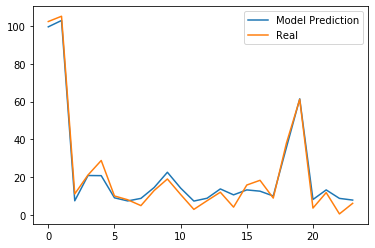

Prediction :  99.59107142857142       real : 102.4
Prediction :  102.95642857142857       real : 105.2
Prediction :  7.455071428571429       real : 11.1
Prediction :  20.841714285714286       real : 21.1
Prediction :  20.766928571428572       real : 28.8
Prediction :  9.02557142857143       real : 10.0
Prediction :  7.380285714285714       real : 8.0
Prediction :  8.726428571428572       real : 4.9
Prediction :  14.484928571428572       real : 12.9
Prediction :  22.561785714285715       real : 19.0
Prediction :  14.185785714285716       real : 10.8
Prediction :  7.3055       real : 2.9
Prediction :  8.801214285714286       real : 7.5
Prediction :  13.73707142857143       real : 12.0
Prediction :  10.59607142857143       real : 4.1
Prediction :  13.213571428571429       real : 15.8
Prediction :  12.5405       real : 18.3
Prediction :  9.997785714285714       real : 8.9
Prediction :  35.798857142857145       real : 38.1
Prediction :  61.45035714285714       real : 61.2
Prediction :  8.12

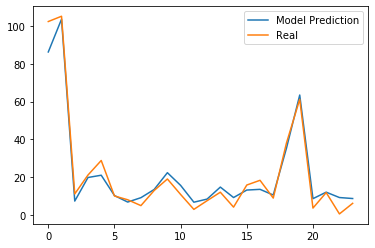

Prediction :  86.27921428571429       real : 102.4
Prediction :  103.62950000000001       real : 105.2
Prediction :  7.3055       real : 11.1
Prediction :  19.79471428571429       real : 21.1
Prediction :  20.991285714285713       real : 28.8
Prediction :  10.222142857142858       real : 10.0
Prediction :  6.782000000000001       real : 8.0
Prediction :  9.100357142857144       real : 4.9
Prediction :  13.437928571428573       real : 12.9
Prediction :  22.33742857142857       real : 19.0
Prediction :  15.606714285714286       real : 10.8
Prediction :  6.707214285714286       real : 2.9
Prediction :  8.3525       real : 7.5
Prediction :  14.709285714285715       real : 12.0
Prediction :  9.175142857142857       real : 4.1
Prediction :  13.138785714285714       real : 15.8
Prediction :  13.512714285714285       real : 18.3
Prediction :  10.521285714285716       real : 8.9
Prediction :  35.35014285714286       real : 38.1
Prediction :  63.469571428571435       real : 61.2
Prediction :  8.

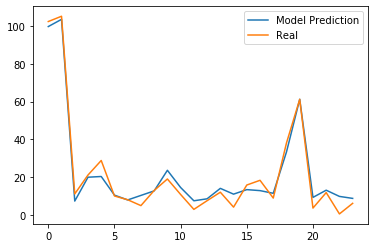

Prediction :  99.74064285714286       real : 102.4
Prediction :  103.55471428571428       real : 105.2
Prediction :  7.3055       real : 11.1
Prediction :  19.944285714285716       real : 21.1
Prediction :  20.318214285714287       real : 28.8
Prediction :  10.4465       real : 10.0
Prediction :  7.903785714285715       real : 8.0
Prediction :  10.296928571428571       real : 4.9
Prediction :  12.69007142857143       real : 12.9
Prediction :  23.608785714285712       real : 19.0
Prediction :  14.484928571428572       real : 10.8
Prediction :  7.455071428571429       real : 2.9
Prediction :  8.502071428571428       real : 7.5
Prediction :  14.036214285714287       real : 12.0
Prediction :  10.97       real : 4.1
Prediction :  13.363142857142858       real : 15.8
Prediction :  12.839642857142858       real : 18.3
Prediction :  11.418714285714286       real : 8.9
Prediction :  33.33092857142857       real : 38.1
Prediction :  61.226000000000006       real : 61.2
Prediction :  9.2499285714

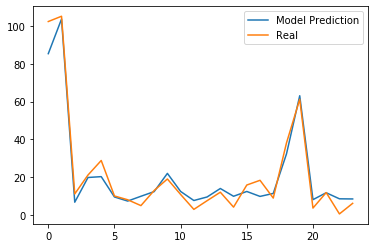

Prediction :  85.38178571428571       real : 102.4
Prediction :  103.70428571428572       real : 105.2
Prediction :  6.707214285714286       real : 11.1
Prediction :  19.79471428571429       real : 21.1
Prediction :  20.24342857142857       real : 28.8
Prediction :  9.474285714285715       real : 10.0
Prediction :  7.3055       real : 8.0
Prediction :  9.848214285714286       real : 4.9
Prediction :  12.316142857142859       real : 12.9
Prediction :  21.9635       real : 19.0
Prediction :  12.39092857142857       real : 10.8
Prediction :  7.604642857142857       real : 2.9
Prediction :  9.474285714285715       real : 7.5
Prediction :  13.961428571428572       real : 12.0
Prediction :  9.848214285714286       real : 4.1
Prediction :  12.39092857142857       real : 15.8
Prediction :  9.773428571428573       real : 18.3
Prediction :  11.343928571428572       real : 8.9
Prediction :  32.283928571428575       real : 38.1
Prediction :  63.09564285714286       real : 61.2
Prediction :  8.0533

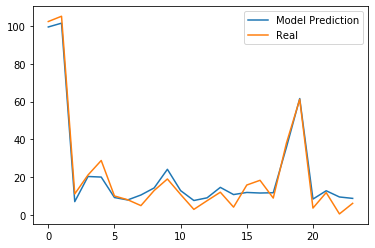

Prediction :  99.51628571428573       real : 102.4
Prediction :  101.53550000000001       real : 105.2
Prediction :  7.0063571428571425       real : 11.1
Prediction :  20.318214285714287       real : 21.1
Prediction :  20.01907142857143       real : 28.8
Prediction :  9.175142857142857       real : 10.0
Prediction :  7.903785714285715       real : 8.0
Prediction :  10.521285714285716       real : 4.9
Prediction :  14.260571428571428       real : 12.9
Prediction :  24.132285714285718       real : 19.0
Prediction :  12.839642857142858       real : 10.8
Prediction :  7.604642857142857       real : 2.9
Prediction :  9.02557142857143       real : 7.5
Prediction :  14.559714285714287       real : 12.0
Prediction :  10.745642857142856       real : 4.1
Prediction :  11.86742857142857       real : 15.8
Prediction :  11.568285714285715       real : 18.3
Prediction :  11.717857142857143       real : 8.9
Prediction :  35.873642857142855       real : 38.1
Prediction :  61.59992857142858       real 

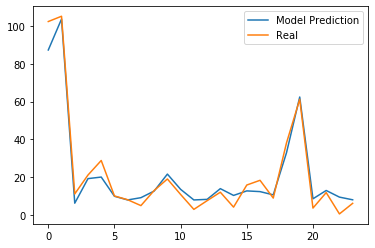

Prediction :  87.32621428571429       real : 102.4
Prediction :  103.70428571428572       real : 105.2
Prediction :  6.183714285714285       real : 11.1
Prediction :  19.196428571428573       real : 21.1
Prediction :  20.01907142857143       real : 28.8
Prediction :  9.848214285714286       real : 10.0
Prediction :  7.903785714285715       real : 8.0
Prediction :  9.100357142857144       real : 4.9
Prediction :  12.615285714285715       real : 12.9
Prediction :  21.58957142857143       real : 19.0
Prediction :  13.512714285714285       real : 10.8
Prediction :  7.903785714285715       real : 2.9
Prediction :  8.202928571428572       real : 7.5
Prediction :  13.886642857142856       real : 12.0
Prediction :  10.296928571428571       real : 4.1
Prediction :  12.69007142857143       real : 15.8
Prediction :  12.316142857142859       real : 18.3
Prediction :  10.59607142857143       real : 8.9
Prediction :  32.882214285714284       real : 38.1
Prediction :  62.42257142857143       real : 6

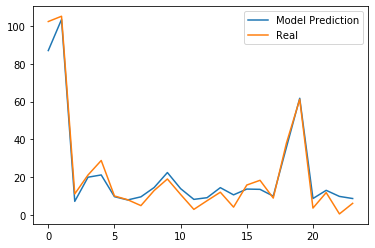

Prediction :  87.02707142857143       real : 102.4
Prediction :  103.47992857142857       real : 105.2
Prediction :  7.155928571428572       real : 11.1
Prediction :  19.944285714285716       real : 21.1
Prediction :  21.140857142857143       real : 28.8
Prediction :  9.623857142857142       real : 10.0
Prediction :  7.903785714285715       real : 8.0
Prediction :  9.549071428571429       real : 4.9
Prediction :  14.484928571428572       real : 12.9
Prediction :  22.41221428571429       real : 19.0
Prediction :  13.886642857142856       real : 10.8
Prediction :  8.202928571428572       real : 2.9
Prediction :  9.100357142857144       real : 7.5
Prediction :  14.410142857142858       real : 12.0
Prediction :  10.59607142857143       real : 4.1
Prediction :  13.662285714285714       real : 15.8
Prediction :  13.512714285714285       real : 18.3
Prediction :  9.923       real : 8.9
Prediction :  35.873642857142855       real : 38.1
Prediction :  61.749500000000005       real : 61.2
Predic

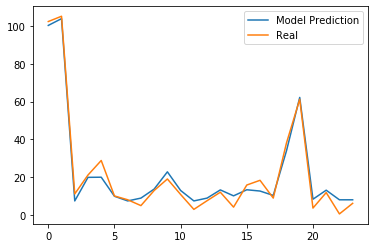

Prediction :  100.33892857142857       real : 102.4
Prediction :  103.92864285714286       real : 105.2
Prediction :  7.380285714285714       real : 11.1
Prediction :  19.8695       real : 21.1
Prediction :  19.944285714285716       real : 28.8
Prediction :  9.848214285714286       real : 10.0
Prediction :  7.380285714285714       real : 8.0
Prediction :  8.876       real : 4.9
Prediction :  13.662285714285714       real : 12.9
Prediction :  22.78614285714286       real : 19.0
Prediction :  12.914428571428571       real : 10.8
Prediction :  7.380285714285714       real : 2.9
Prediction :  8.876       real : 7.5
Prediction :  13.213571428571429       real : 12.0
Prediction :  10.072571428571429       real : 4.1
Prediction :  13.288357142857143       real : 15.8
Prediction :  12.615285714285715       real : 18.3
Prediction :  10.296928571428571       real : 8.9
Prediction :  33.92921428571429       real : 38.1
Prediction :  62.198214285714286       real : 61.2
Prediction :  8.27771428571

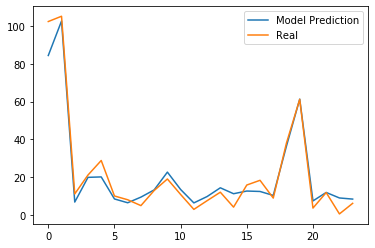

Prediction :  84.40957142857144       real : 102.4
Prediction :  102.65728571428572       real : 105.2
Prediction :  6.782000000000001       real : 11.1
Prediction :  19.8695       real : 21.1
Prediction :  20.093857142857143       real : 28.8
Prediction :  8.427285714285714       real : 10.0
Prediction :  6.4080714285714295       real : 8.0
Prediction :  9.399500000000002       real : 4.9
Prediction :  13.213571428571429       real : 12.9
Prediction :  22.63657142857143       real : 19.0
Prediction :  13.437928571428573       real : 10.8
Prediction :  6.333285714285714       real : 2.9
Prediction :  9.698642857142858       real : 7.5
Prediction :  14.335357142857143       real : 12.0
Prediction :  11.194357142857143       real : 4.1
Prediction :  12.615285714285715       real : 15.8
Prediction :  12.39092857142857       real : 18.3
Prediction :  10.296928571428571       real : 8.9
Prediction :  36.47192857142858       real : 38.1
Prediction :  61.300785714285716       real : 61.2
Pred

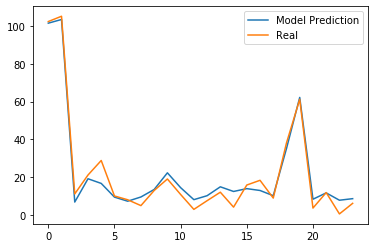

Prediction :  101.53550000000001       real : 102.4
Prediction :  103.47992857142857       real : 105.2
Prediction :  6.782000000000001       real : 11.1
Prediction :  19.121642857142856       real : 21.1
Prediction :  16.653714285714287       real : 28.8
Prediction :  9.399500000000002       real : 10.0
Prediction :  7.230714285714286       real : 8.0
Prediction :  9.474285714285715       real : 4.9
Prediction :  13.437928571428573       real : 12.9
Prediction :  22.262642857142858       real : 19.0
Prediction :  14.410142857142858       real : 10.8
Prediction :  8.053357142857143       real : 2.9
Prediction :  10.147357142857144       real : 7.5
Prediction :  14.858857142857143       real : 12.0
Prediction :  12.39092857142857       real : 4.1
Prediction :  13.886642857142856       real : 15.8
Prediction :  12.914428571428571       real : 18.3
Prediction :  10.147357142857144       real : 8.9
Prediction :  35.12578571428571       real : 38.1
Prediction :  62.198214285714286       rea

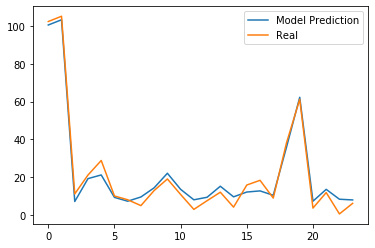

Prediction :  100.56328571428571       real : 102.4
Prediction :  103.33035714285714       real : 105.2
Prediction :  7.081142857142857       real : 11.1
Prediction :  19.196428571428573       real : 21.1
Prediction :  21.140857142857143       real : 28.8
Prediction :  9.24992857142857       real : 10.0
Prediction :  7.230714285714286       real : 8.0
Prediction :  9.474285714285715       real : 4.9
Prediction :  14.335357142857143       real : 12.9
Prediction :  22.038285714285717       real : 19.0
Prediction :  13.512714285714285       real : 10.8
Prediction :  7.978571428571429       real : 2.9
Prediction :  9.324714285714286       real : 7.5
Prediction :  15.158000000000001       real : 12.0
Prediction :  9.549071428571429       real : 4.1
Prediction :  12.091785714285715       real : 15.8
Prediction :  12.69007142857143       real : 18.3
Prediction :  10.371714285714285       real : 8.9
Prediction :  35.798857142857145       real : 38.1
Prediction :  62.272999999999996       real 

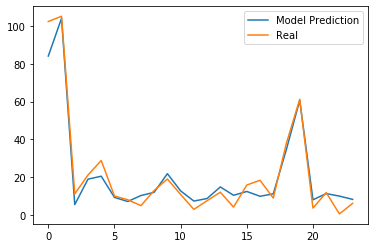

Prediction :  84.11042857142857       real : 102.4
Prediction :  104.07821428571428       real : 105.2
Prediction :  5.4358571428571425       real : 11.1
Prediction :  18.897285714285715       real : 21.1
Prediction :  20.467785714285714       real : 28.8
Prediction :  9.24992857142857       real : 10.0
Prediction :  7.081142857142857       real : 8.0
Prediction :  10.222142857142858       real : 4.9
Prediction :  11.942214285714286       real : 12.9
Prediction :  21.813928571428573       real : 19.0
Prediction :  12.69007142857143       real : 10.8
Prediction :  7.3055       real : 2.9
Prediction :  8.651642857142859       real : 7.5
Prediction :  14.78407142857143       real : 12.0
Prediction :  10.371714285714285       real : 4.1
Prediction :  12.39092857142857       real : 15.8
Prediction :  9.848214285714286       real : 18.3
Prediction :  11.119571428571428       real : 8.9
Prediction :  34.82664285714286       real : 38.1
Prediction :  60.7025       real : 61.2
Prediction :  7.9

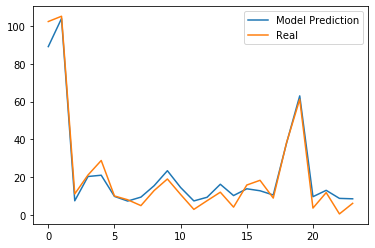

Prediction :  89.12107142857143       real : 102.4
Prediction :  104.00342857142859       real : 105.2
Prediction :  7.455071428571429       real : 11.1
Prediction :  20.318214285714287       real : 21.1
Prediction :  20.991285714285713       real : 28.8
Prediction :  9.773428571428573       real : 10.0
Prediction :  7.3055       real : 8.0
Prediction :  9.399500000000002       real : 4.9
Prediction :  15.457142857142857       real : 12.9
Prediction :  23.384428571428572       real : 19.0
Prediction :  14.484928571428572       real : 10.8
Prediction :  7.380285714285714       real : 2.9
Prediction :  9.324714285714286       real : 7.5
Prediction :  16.205       real : 12.0
Prediction :  10.222142857142858       real : 4.1
Prediction :  13.811857142857145       real : 15.8
Prediction :  12.764857142857142       real : 18.3
Prediction :  10.521285714285716       real : 8.9
Prediction :  37.892857142857146       real : 38.1
Prediction :  63.02085714285714       real : 61.2
Prediction :  9

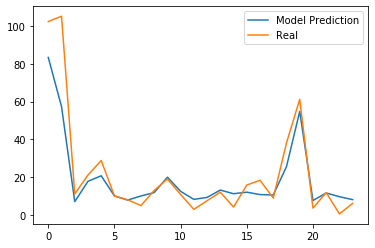

Prediction :  83.36257142857143       real : 102.4
Prediction :  57.33714285714286       real : 105.2
Prediction :  7.0063571428571425       real : 11.1
Prediction :  17.7755       real : 21.1
Prediction :  20.69214285714286       real : 28.8
Prediction :  9.997785714285714       real : 10.0
Prediction :  7.829000000000001       real : 8.0
Prediction :  9.997785714285714       real : 4.9
Prediction :  11.792642857142857       real : 12.9
Prediction :  19.944285714285716       real : 19.0
Prediction :  12.465714285714286       real : 10.8
Prediction :  8.202928571428572       real : 2.9
Prediction :  9.24992857142857       real : 7.5
Prediction :  13.138785714285714       real : 12.0
Prediction :  11.194357142857143       real : 4.1
Prediction :  12.017000000000001       real : 15.8
Prediction :  10.745642857142856       real : 18.3
Prediction :  10.521285714285716       real : 8.9
Prediction :  25.553214285714287       real : 38.1
Prediction :  54.79442857142857       real : 61.2
Predi

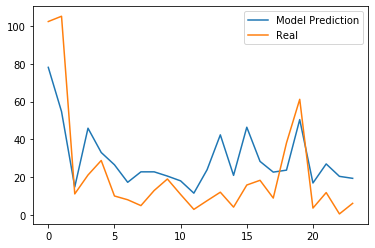

Prediction :  78.12757142857143       real : 102.4
Prediction :  54.71964285714286       real : 105.2
Prediction :  14.78407142857143       real : 11.1
Prediction :  45.89492857142857       real : 21.1
Prediction :  33.03178571428571       real : 28.8
Prediction :  26.52542857142857       real : 10.0
Prediction :  17.252       real : 8.0
Prediction :  22.78614285714286       real : 4.9
Prediction :  22.78614285714286       real : 12.9
Prediction :  20.54257142857143       real : 19.0
Prediction :  17.99985714285714       real : 10.8
Prediction :  11.4935       real : 2.9
Prediction :  23.90792857142857       real : 7.5
Prediction :  42.38       real : 12.0
Prediction :  20.916500000000003       real : 4.1
Prediction :  46.41842857142857       real : 15.8
Prediction :  28.320285714285717       real : 18.3
Prediction :  22.63657142857143       real : 8.9
Prediction :  23.68357142857143       real : 38.1
Prediction :  50.456857142857146       real : 61.2
Prediction :  16.878071428571428  

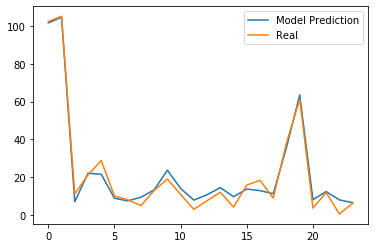

Prediction :  101.68507142857143       real : 102.4
Prediction :  104.6765       real : 105.2
Prediction :  6.931571428571429       real : 11.1
Prediction :  22.038285714285717       real : 21.1
Prediction :  21.514785714285715       real : 28.8
Prediction :  8.801214285714286       real : 10.0
Prediction :  7.380285714285714       real : 8.0
Prediction :  9.324714285714286       real : 4.9
Prediction :  13.213571428571429       real : 12.9
Prediction :  23.68357142857143       real : 19.0
Prediction :  13.961428571428572       real : 10.8
Prediction :  7.829000000000001       real : 2.9
Prediction :  10.670857142857143       real : 7.5
Prediction :  14.410142857142858       real : 12.0
Prediction :  9.623857142857142       real : 4.1
Prediction :  13.662285714285714       real : 15.8
Prediction :  12.839642857142858       real : 18.3
Prediction :  11.194357142857143       real : 8.9
Prediction :  35.798857142857145       real : 38.1
Prediction :  63.544357142857145       real : 61.2
P

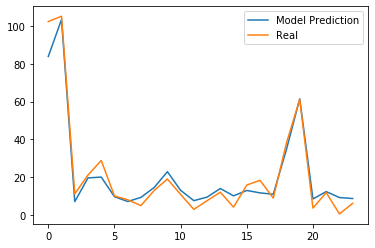

Prediction :  83.88607142857143       real : 102.4
Prediction :  103.47992857142857       real : 105.2
Prediction :  7.0063571428571425       real : 11.1
Prediction :  19.570357142857144       real : 21.1
Prediction :  20.01907142857143       real : 28.8
Prediction :  9.623857142857142       real : 10.0
Prediction :  7.081142857142857       real : 8.0
Prediction :  9.24992857142857       real : 4.9
Prediction :  14.484928571428572       real : 12.9
Prediction :  22.86092857142857       real : 19.0
Prediction :  12.989214285714286       real : 10.8
Prediction :  7.529857142857144       real : 2.9
Prediction :  9.399500000000002       real : 7.5
Prediction :  13.961428571428572       real : 12.0
Prediction :  10.072571428571429       real : 4.1
Prediction :  12.914428571428571       real : 15.8
Prediction :  11.64307142857143       real : 18.3
Prediction :  10.895214285714287       real : 8.9
Prediction :  34.75185714285714       real : 38.1
Prediction :  61.45035714285714       real : 6

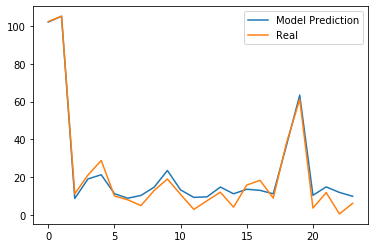

Prediction :  102.131       real : 102.4
Prediction :  105.2       real : 105.2
Prediction :  8.672642857142858       real : 11.1
Prediction :  19.048785714285714       real : 21.1
Prediction :  21.24092857142857       real : 28.8
Prediction :  11.230142857142857       real : 10.0
Prediction :  8.818785714285713       real : 8.0
Prediction :  10.280214285714285       real : 4.9
Prediction :  14.6645       real : 12.9
Prediction :  23.506142857142855       real : 19.0
Prediction :  13.203071428571429       real : 10.8
Prediction :  9.257214285714285       real : 2.9
Prediction :  9.5495       real : 7.5
Prediction :  14.737571428571428       real : 12.0
Prediction :  11.15707142857143       real : 4.1
Prediction :  13.568428571428571       real : 15.8
Prediction :  12.983857142857143       real : 18.3
Prediction :  11.15707142857143       real : 8.9
Prediction :  36.805142857142854       real : 38.1
Prediction :  63.40314285714285       real : 61.2
Prediction :  10.353285714285715      

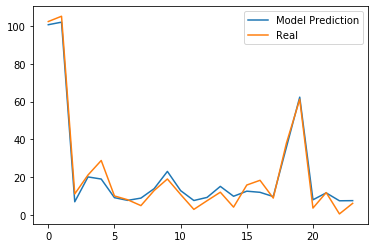

Prediction :  100.71285714285715       real : 102.4
Prediction :  102.059       real : 105.2
Prediction :  6.931571428571429       real : 11.1
Prediction :  20.093857142857143       real : 21.1
Prediction :  18.97207142857143       real : 28.8
Prediction :  9.100357142857144       real : 10.0
Prediction :  7.679428571428572       real : 8.0
Prediction :  8.876       real : 4.9
Prediction :  13.886642857142856       real : 12.9
Prediction :  23.0105       real : 19.0
Prediction :  12.839642857142858       real : 10.8
Prediction :  7.604642857142857       real : 2.9
Prediction :  9.24992857142857       real : 7.5
Prediction :  15.083214285714286       real : 12.0
Prediction :  9.848214285714286       real : 4.1
Prediction :  12.5405       real : 15.8
Prediction :  11.942214285714286       real : 18.3
Prediction :  9.698642857142858       real : 8.9
Prediction :  35.94842857142857       real : 38.1
Prediction :  62.34778571428572       real : 61.2
Prediction :  7.978571428571429       rea

In [7]:
all_test_y = []
all_test_predication = []
avg_ame=0
for i in range(number_of_folds):
    print(" ")
    print("Fold ","#",i+1)
    start  = time.time()
    model = RegressionTsetlinMachine(3000, 1400, 3.2)
    
    train_data, test_data = trainTestSpliter(foldsIndex[i],scaled_data)
    train_x, train_y, test_x, test_y = dataTargetSpluter(train_data,test_data)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(train_x)
    X_transformed_train = b.transform(train_x)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(test_x)
    X_transformed_test = b.transform(test_x)
    
    model.fit(X_transformed_train, train_y, epochs=150)
    
    all_data_x =[]
    all_data_y = []

    for i in scaled_data:
        all_data_x.append(i[:6])
        all_data_y.append(i[6])

    all_data_x = np.array(all_data_x)
    all_data_y = np.array(all_data_y)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(all_data_x)
    X_transformed_all_data_x = b.transform(all_data_x)
    prediction = model.predict(X_transformed_all_data_x)
    end = time.time()

    plt.plot(prediction, label="Model Prediction")
    plt.plot(all_data_y, label="Real")
    plt.legend()
    plt.show()


    for i in range(len(prediction)):
        print("Prediction : ", prediction[i],"     ","real :", all_data_y[i])
    print("All-data-MAE: ",mean_absolute_error(all_data_y,prediction))
    
    prediction = model.predict(X_transformed_test)
    print("Test-MAE: ",mean_absolute_error(test_y,prediction))
    all_test_y.append(test_y)
    all_test_predication.append(prediction)
    avg_ame+=mean_absolute_error(test_y,prediction)
    print("Took: ",end-start, "Seconds")
    print("#################################################################################################")
print("\n \n avg test-MAE : ",avg_ame/number_of_folds)

In [8]:
import statistics 
maes=[]
pred_25 = []
pred_50 = []
for i in range(len(all_test_y)):
    #print((abs(all_test_y[i]-all_test_predication[i])/all_test_y[i]))
    maes.append((abs(all_test_y[i]-all_test_predication[i])/all_test_y[i]))
    if (abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])<0.25:
        pred_25.append(abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])
    if (abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])<0.50:
        pred_50.append(abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])
sum = 0
for i in maes:
    sum+=i
print("MMRE", sum/len(maes))
print("PRED 0.25: ", (((100/24)*len(pred_25)))/100)
print("PRED 0.50: ", (((100/24)*len(pred_50)))/100)
print("Median: ",statistics.median(maes))

MMRE [2.27348828]
PRED 0.25:  0.20833333333333337
PRED 0.50:  0.41666666666666674
Median:  [0.69608566]
